O dataset "Football Players Data" do Kaggle (https://www.kaggle.com/datasets/maso0dahmed/football-players-data) oferece informações detalhadas sobre aproximadamente 17.000 jogadores de futebol, incluindo atributos como nome, idade, nacionalidade, clube, posição, entre outros.

--> Análise Exploratória dos Dados (EDA):

- Carregar o Dataset: Utilize bibliotecas como pandas para carregar e visualizar os dados;
- Limpeza dos Dados: Verifique a presença de valores ausentes ou inconsistências e trate-os adequadamente;
- Análise Estatística: Explore estatísticas descritivas para entender a distribuição de variáveis;
- Visualização de Dados: Crie gráficos para visualizar a relação entre variáveis;

--> Modelagem Preditiva:

- Seleção de Variáveis: Identifique quais variáveis serão utilizadas como preditoras e qual será a variável alvo;
- Divisão dos Dados: Separe os dados em conjuntos de treino e teste para validar o modelo;
- Escolha do Modelo: Modelos de regressão linear;
- Avaliação do Modelo: Métricas como o RMSE para avaliar a performance do modelo.

--> Implementação e Validação:

- Treinamento do Modelo: Treine o modelo selecionado com o conjunto de dados de treino;
- Validação: Teste o modelo com o conjunto de dados de teste para verificar sua precisão;
- Ajustes Finais: Realize ajustes no modelo conforme necessário para melhorar a acurácia.


1 - Preparação do ambiente

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

2 - Fazer upload do arquivo CSV e carregar os dados

In [2]:
# Carregar o arquivo CSV em um DF
df = pd.read_csv('fifa_players.csv')

In [3]:
# Dicionário de abreviações das posições
posicoes = {
    'GK': 'Goleiro',
    'CB': 'Zagueiro',
    'LB': 'Lateral Esquerdo',
    'RB': 'Lateral Direito',
    'CDM': 'Volante',
    'CM': 'Meio-Campista',
    'CAM': 'Meia Ofensivo',
    'LM': 'Meia Esquerda',
    'RM': 'Meia Direita',
    'CF': 'Atacante Central',
    'ST': 'Centroavante',
    'LW': 'Ponta Esquerda',
    'RW': 'Ponta Direita'
}

# Criar uma nova coluna com a posição descritiva
df['positions_desc'] = df['positions'].map(posicoes)

In [4]:
# Função para mapear múltiplas posições
def mapear_posicoes(pos):
    if pd.isna(pos):  #Verifica se o valor é NaN
        return None
    posicoes_list = pos.split(',')  # Divide as posições se houver mais de uma
    return ','.join([posicoes.get(p, p) for p in posicoes_list])  # Mapeia e junta

# Aplicar a função na coluna de posição
df['positions_desc'] = df['positions'].apply(mapear_posicoes)

# Exibir as primeiras linhas para conferência
display(df[['positions', 'positions_desc']].head())

,positions,positions_desc
0,"CF,RW,ST","Atacante Central,Ponta Direita,Centroavante"
1,"CAM,RM,CM","Meia Ofensivo,Meia Direita,Meio-Campista"
2,"CM,CAM","Meio-Campista,Meia Ofensivo"
3,"LW,ST","Ponta Esquerda,Centroavante"
4,CB,Zagueiro


In [6]:
# Reorganizar as colunas para que 'positions_desc' venha logo após 'positions'
colunas = df.columns.tolist() #Lista das colunas
colunas.insert(colunas.index('positions') + 1, colunas.pop(colunas.index('positions_desc'))) #Reorganiza
df = df[colunas] #Reatribui o DataFrame com a nova ordem

# Exibir as primeiras linhas para conferir
display(df.head())

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,positions_desc,nationality,overall_rating,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST","Atacante Central,Ponta Direita,Centroavante",Argentina,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM","Meia Ofensivo,Meia Direita,Meio-Campista",Denmark,88,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM","Meio-Campista,Meia Ofensivo",France,88,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST","Ponta Esquerda,Centroavante",Italy,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Zagueiro,Senegal,88,...,15,87,88,24,49,33,80,91,88,87


3 - Análise exploratória de dados

In [7]:
# Verificar informações básicas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   positions_desc                 17954 non-null  object 
 8   nationality                    17954 non-null  object 
 9   overall_rating                 17954 non-null  int64  
 10  potential                      17954 non-null  int64  
 11  value_euro                     17699 non-null  float64
 12  wage_euro                      17708 non-null 

In [8]:
# Estatísticas descritivas
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


In [9]:
# Verificar valores ausentes
df.isnull().sum()

,0
name,0
full_name,0
birth_date,0
age,0
height_cm,0
weight_kgs,0
positions,0
positions_desc,0
nationality,0
overall_rating,0


4 - Limpeza de dados

In [10]:
# Preencher valores ausentes com a média e apenas nas colunas numéricas
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)

In [11]:
# Remover colunas desnecessárias
colunas_para_remover = ['name', 'release_clause_euro', 'national_team', 'national_rating', 'national_jersey_number', 'balance', 'reactions', 'standing_tackle', 'sliding_tackle']
df.drop(columns=[col for col in colunas_para_remover if col in df.columns], inplace=True)

display(df.head())

,full_name,birth_date,age,height_cm,weight_kgs,positions,positions_desc,nationality,overall_rating,potential,...,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking
0,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST","Atacante Central,Ponta Direita,Centroavante",Argentina,94,94,...,72,66,94,48,22,94,94,75,96,33
1,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM","Meia Ofensivo,Meia Direita,Meio-Campista",Denmark,88,89,...,92,58,89,46,56,84,91,67,88,59
2,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM","Meio-Campista,Meia Ofensivo",France,88,91,...,88,87,82,78,64,82,88,82,87,63
3,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST","Ponta Esquerda,Centroavante",Italy,88,88,...,75,44,84,34,26,83,87,61,83,51
4,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Zagueiro,Senegal,88,91,...,75,94,15,87,88,24,49,33,80,91


5 - Visualização de dados

In [12]:
# Filtrar apenas jogadores atacantes
df_centroavante = df[df['positions'] == 'ST']

6 - Modelagem preditiva

In [13]:
# Selecionar variáveis para o modelo
X = df_centroavante[['height_cm']]
y = df_centroavante['weight_kgs']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [14]:
# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

7 - Avaliação do modelo

In [15]:
# Avalie a performance do modelo usando métricas como o RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.4f}')

RMSE: 6.21
R² Score: 0.2289


In [16]:
# Prever o peso ideal de um jogador atacante com 1,70m
altura_jogador = np.array([[170]])  #1,70m em cm
peso_previsto = model.predict(altura_jogador)
print(f'Peso previsto para um atacante de 1,70m: {peso_previsto[0]:.2f} kg')

Peso previsto para um atacante de 1,70m: 75.61 kg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
# Calcular a idade média dos goleiros

# Filtrar apenas os goleiros (GK - Goalkeeper)
df_goleiros = df[df['positions'] == 'GK']

# Calcular a idade média
idade_media_goleiros = df_goleiros['age'].mean()

# Exibir o resultado
print(f'A idade média dos goleiros é: {idade_media_goleiros:.2f} anos')

A idade média dos goleiros é: 26.45 anos


In [18]:
# Encontrar o pé dominante dos atacantes

# Filtrar apenas atacantes (Centroavantes e Pontas)
df_atacantes = df[df['positions'].isin(['ST', 'CF', 'RW', 'LW'])]

# Contar a frequência de cada pé dominante
preferencia_pe = df_atacantes['preferred_foot'].value_counts()

# Exibir o resultado
print(f'Pé mais usado na finalização pelos atacantes:\n{preferencia_pe}')

Pé mais usado na finalização pelos atacantes:
preferred_foot
Right    1635
Left      282
Name: count, dtype: int64


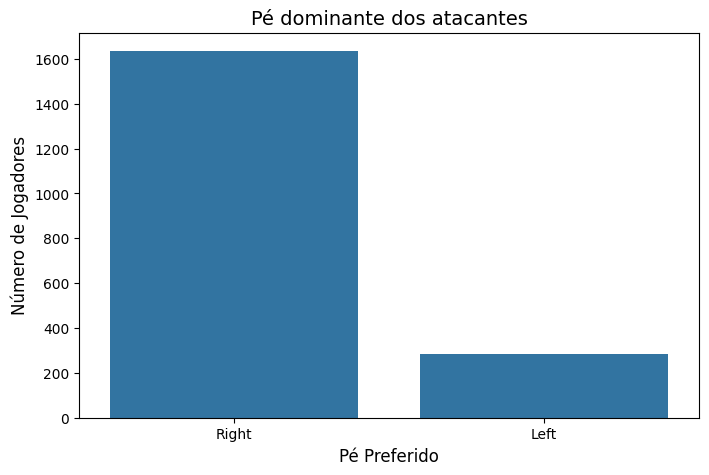

In [20]:
# Criar o gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(x=preferencia_pe.index, y=preferencia_pe.values)

# Personalizar o gráfico
plt.title('Pé dominante dos atacantes', fontsize=14)
plt.xlabel('Pé Preferido', fontsize=12)
plt.ylabel('Número de Jogadores', fontsize=12)
plt.xticks(rotation=0)

# Exibir o gráfico
plt.show()

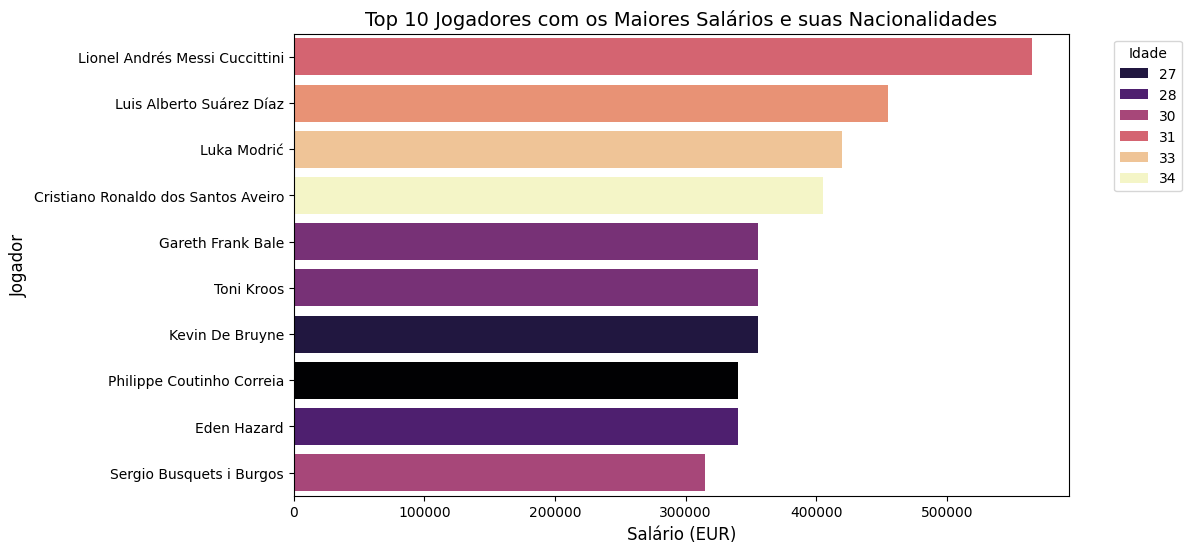

In [22]:
# Selecionar os 10 jogadores com os maiores salários
top10_salarios = df.nlargest(10, 'wage_euro')

# Criar o gráfico de barras horizontal
plt.figure(figsize=(10,6))
sns.barplot(y=top10_salarios['full_name'], x=top10_salarios['wage_euro'], hue=top10_salarios['age'], dodge=False, palette='magma')

# Personalizar o gráfico
plt.title('Top 10 Jogadores com os Maiores Salários e suas Nacionalidades', fontsize=14)
plt.xlabel('Salário (EUR)', fontsize=12)
plt.ylabel('Jogador', fontsize=12)
plt.legend(title='Idade', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibir o gráfico
plt.show() #eixo Y mostra os nomes dos 10 jogadores mais bem pagos / eixo X representa o valor do salário

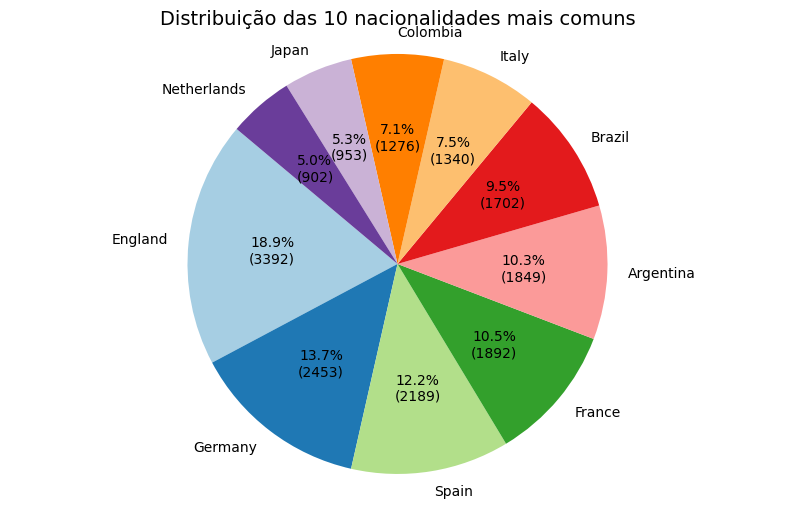

In [23]:
# Contar a frequência de cada nacionalidade e calcular percentual
top10_nacionalidades = df['nationality'].value_counts().nlargest(10)
total_jogadores = df.shape[0]
percentuais = (top10_nacionalidades / total_jogadores) * 100

# Criar o gráfico de pizza
plt.figure(figsize=(10,6))
plt.pie(top10_nacionalidades, labels=top10_nacionalidades.index, autopct=lambda p: f'{p:.1f}%\n({int(p*total_jogadores/100)})', colors=plt.cm.Paired.colors, startangle=140)

# Personalizar
plt.title('Distribuição das 10 nacionalidades mais comuns', fontsize=14)
plt.axis('equal')  #formato circular

# Exibir o gráfico
plt.show()

Passos para prever a posição ideal de um jogador

1- Definir as variáveis

Variáveis de entrada (X): idade, altura, peso
Variável alvo (y):posição (ST, GK, CM, etc, ...)

2- Treinar um modelo de Machine Learning
Podemos usar um classificador supervisionado, como Random Forest ou K-Nearest Neighbors (KNN), para prever a posição ideal.

In [29]:
# Filtrar as colunas necessárias
df_posicoes = df[['age', 'height_cm', 'weight_kgs', 'positions']].dropna()

# Codificar as posições (Transformar de texto para número)
label_encoder = LabelEncoder()
df_posicoes['positions_encoded'] = label_encoder.fit_transform(df_posicoes['positions'])

# Definir as variáveis
x = df_posicoes[['age', 'height_cm', 'weight_kgs']]  # Características do jogador
y = df_posicoes['positions_encoded']  # Posição codificada

# Dividir em treino e teste (80% treino, 20% teste)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# Criar e treinar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=123)
model.fit(x_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(x_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2%}')

# Função para prever a posição de um novo jogador
def prever_posicao(idade, altura, peso):
    entrada = np.array([[idade, altura, peso]])
    posicao_prevista = model.predict(entrada)[0]
    return label_encoder.inverse_transform([posicao_prevista])[0]

# Exemplo: Prevendo a posição de um jogador de 16 anos, 1.75m, 70kg
idade_teste = 16
altura_teste = 175
peso_teste = 70
posicao_sugerida = prever_posicao(idade_teste, altura_teste, peso_teste)
print(f'Para um jogador de {idade_teste} anos, {altura_teste}cm e {peso_teste}kg, a posição ideal seria: {posicao_sugerida}')

Acurácia do modelo: 10.94%
Para um jogador de 16 anos, 175cm e 70kg, a posição ideal seria: CAM


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [30]:
prever_posicao(16, 175, 70)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'CAM'

In [31]:
prever_posicao(25, 160, 80)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'CDM,CM'

In [32]:
prever_posicao(30, 150, 50)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'CAM'